# Bike Sharing Study

## Importing libraries and data from csv

In [48]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")



In [49]:
bike = pd.read_csv('day.csv') # importing dataset

In [50]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [51]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [52]:
## We need to identify the categorical variable from the data dictionary for better EDA and data understanding 

bike['season'] = bike['season'].map( {1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike['weathersit'] = bike['weathersit'].map( {1:"Clear", 2:"Cloudy", 3:"LightRainOrSnow", 4:"HeavyRainOrSnow"})
bike['yr'] = bike['yr'].map( {0:"2018", 1:"2019"})
bike['mnth'] = bike['mnth'].map( {1:"jan", 2:"feb",3:"mar", 4:"apr",5:"may", 6:"jun",7:"jul", 8:"aug",9:"sep", 10:"oct",11:"nov", 12:"dec"})

In [53]:
bike['weekday'] = bike['weekday'].astype(str)

In [54]:
bike = bike.drop(labels=['instant','dteday'], axis=1) # removing variables which is not useful for building model

### As per problem statement, our target variable is 'cnt' i.e. count of total rental bikes including both casual and registered

In [55]:
bike = bike.drop(labels=['casual','registered'], axis=1) 

In [56]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [57]:
bike.describe() # summary statistics of continuous variables

,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [11]:
bike.describe(include='object') # summary statistics of categorical variables

,season,yr,mnth,weekday,weathersit
count,730,730,730,730,730
unique,4,2,12,7,3
top,fall,2018,jan,6,Clear
freq,188,365,62,105,463


In [58]:
order = ["jan","feb","mar", "apr","may", "jun","jul", "aug","sep", "oct","nov", "dec"]
bike['mnth'] = pd.Categorical(bike['mnth'], categories=order) # organizing the month column 

## Exploratory Data Analysis

### Univariate Analysis

In [59]:
# creating a couple of functions for univariate analysis

def univariate_numeric(df,col): 
    sns.set(style="whitegrid")
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(15,7))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[col],ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    plt.show()


def univariate_categorical(df,col,hue =None):
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, palette="ch:.25", y= col, hue = hue) 
    plt.show()
    print(df[col].value_counts())


1.01  temp -  Exploratory analysis


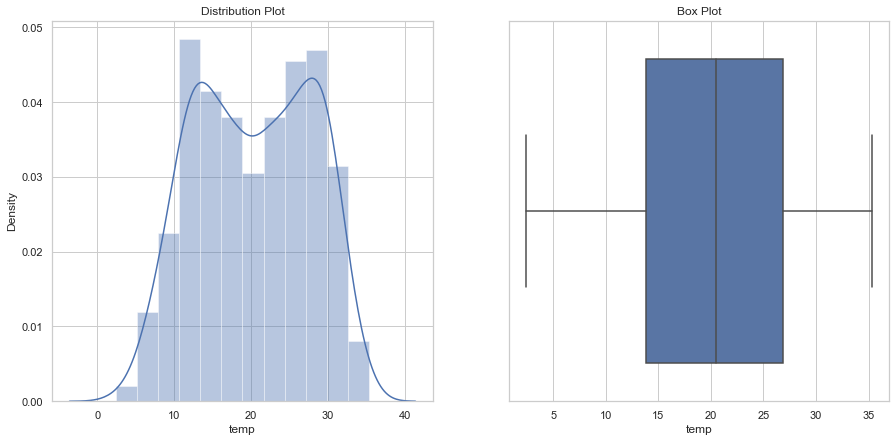


1.02  atemp -  Exploratory analysis


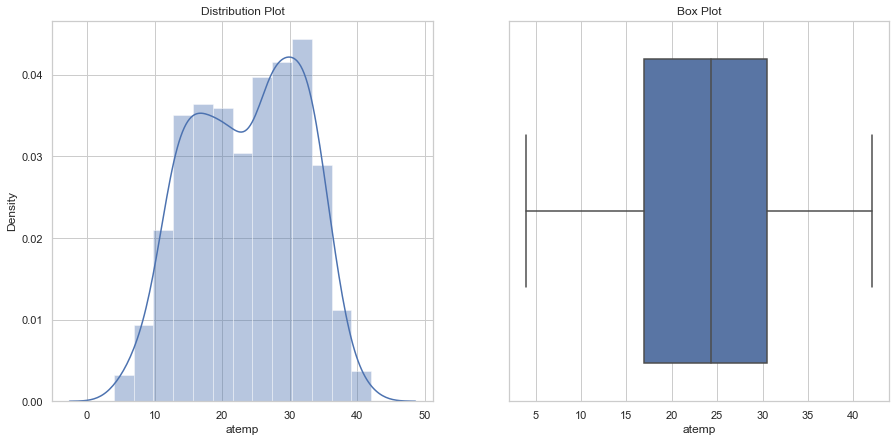


1.03  hum -  Exploratory analysis


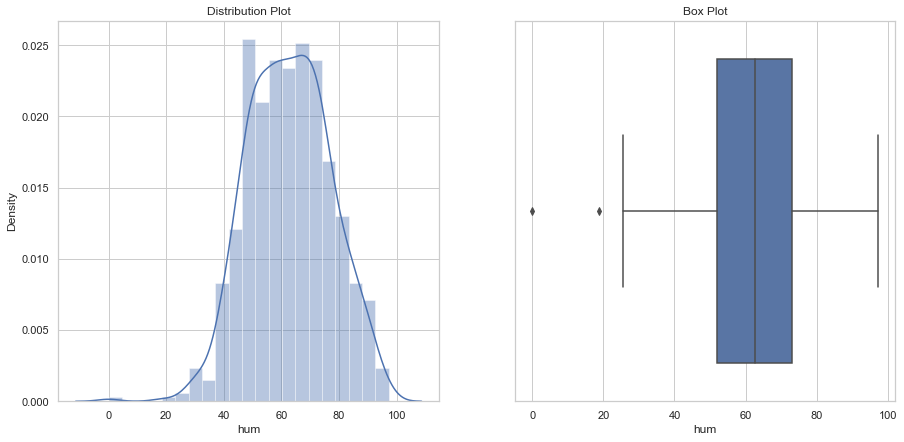


1.04  windspeed -  Exploratory analysis


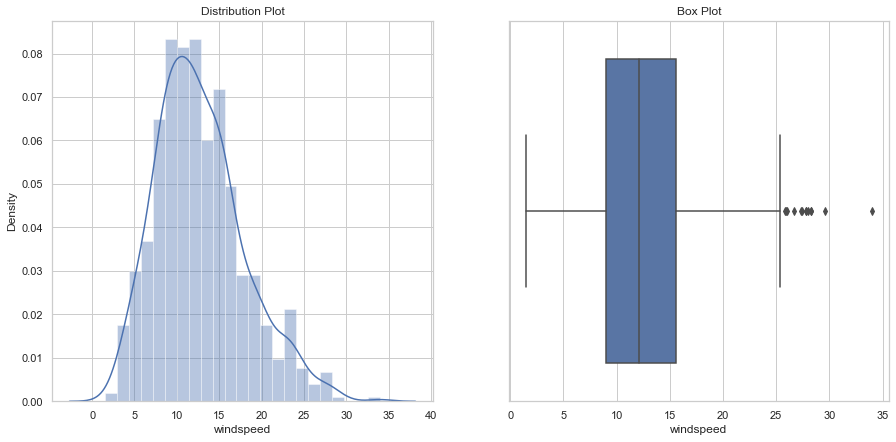


1.05  cnt -  Exploratory analysis


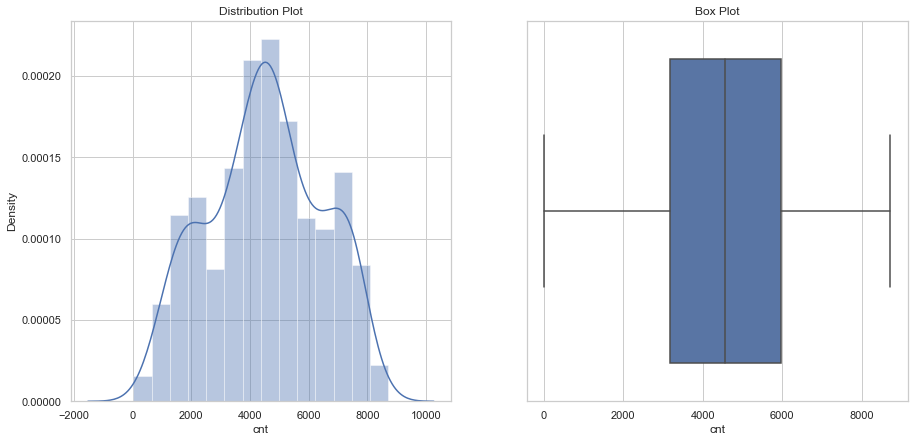

In [60]:
# Let's create the visualizations for continuous variables !!
i= float(1.01)
for column in bike[["temp", "atemp", "hum" ,"windspeed", "cnt"]]:
    print("\n" + str(i) + "  " + column + " -  Exploratory analysis")
    univariate_numeric(bike, col = column)
    i = i + 0.01


2.1  season -  Exploratory analysis


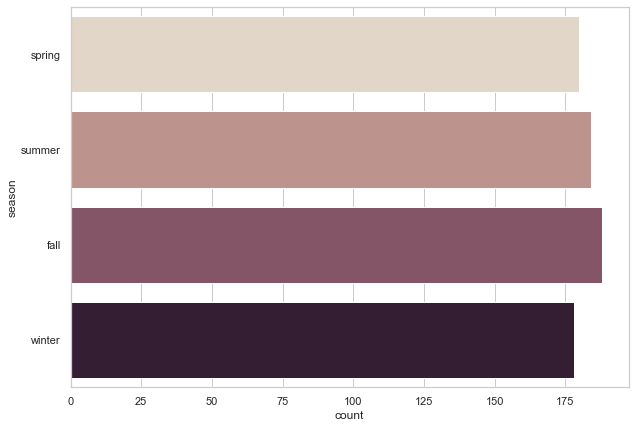

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

2.2  yr -  Exploratory analysis


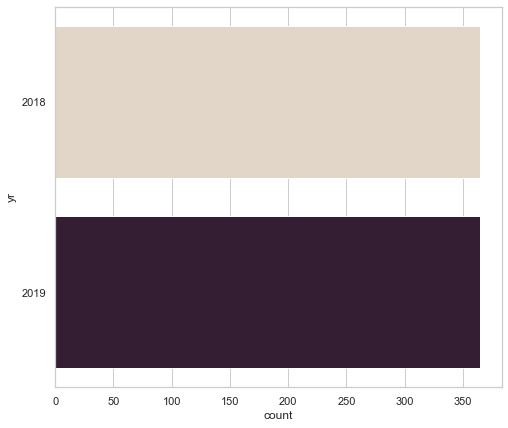

2018    365
2019    365
Name: yr, dtype: int64

2.3  mnth -  Exploratory analysis


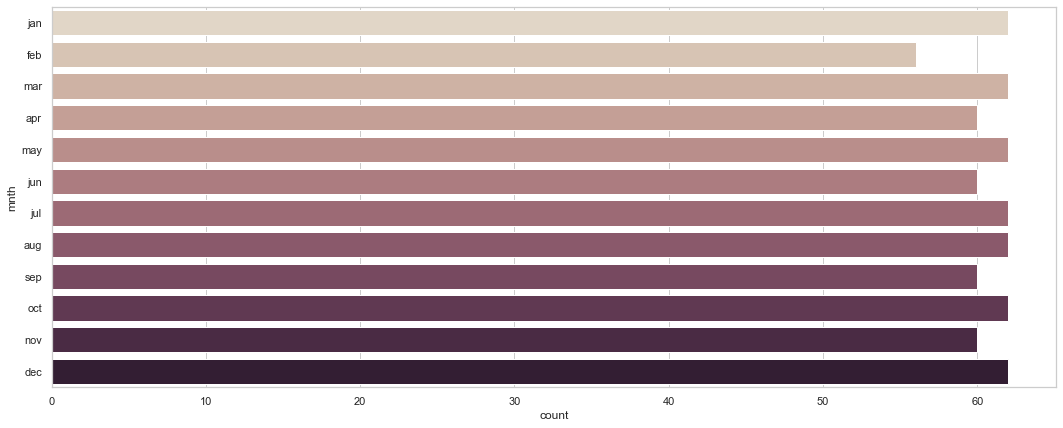

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

2.4  weekday -  Exploratory analysis


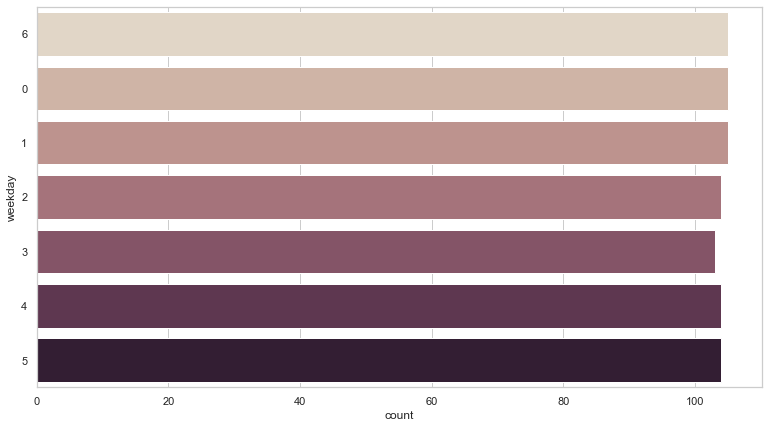

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

2.5  weathersit -  Exploratory analysis


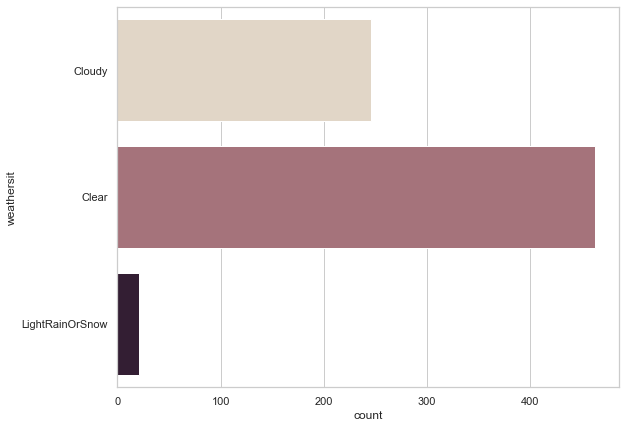

Clear              463
Cloudy             246
LightRainOrSnow     21
Name: weathersit, dtype: int64


In [61]:
i = 2.1
for column in bike.select_dtypes(include=['object','category']).columns:
    print("\n" + str(i) + "  " + column + " -  Exploratory analysis")
    univariate_categorical(bike, col = column)
    i = round(i + 0.1,1)

### Bivariate Analysis

In [63]:
# creating a couple of functions for biivariate analysis

def bivariate_numeric(df,col,groupby,hue= None):
    sns.set(style="whitegrid")
    fig, ax=plt.subplots(nrows =1,ncols=1,figsize=(10,5))
    sns.boxplot(x=groupby, y=col,palette="pastel", data= df,hue=hue)
    plt.show()

### Now we will try to visualize the impact of different Categorical variables on target variable i.e. 'cnt' 


3.1  season -  relation with total rental number


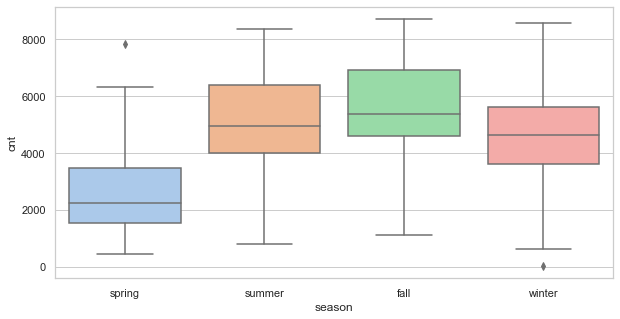


3.2  yr -  relation with total rental number


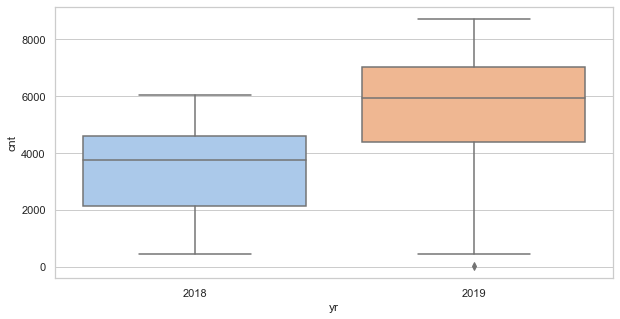


3.3  mnth -  relation with total rental number


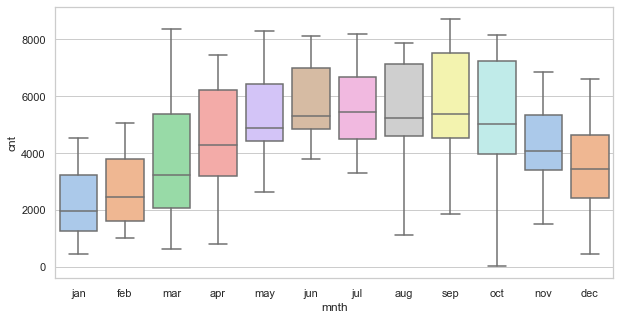


3.4  weekday -  relation with total rental number


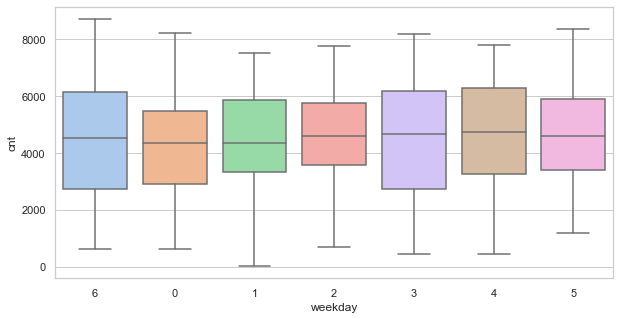


3.5  weathersit -  relation with total rental number


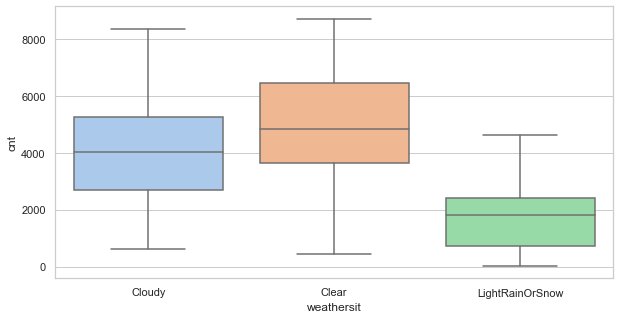

In [17]:


i= float(3.1)
for column in bike.select_dtypes(include=['object','category']).columns:
    print("\n" + str(i) + "  " + column + " -  relation with total rental number")
    bivariate_numeric(bike, col = 'cnt', groupby = column)
    i = round(i + 0.1,1)



#### The boxplots show the effect of categorical variable over bike rental. 
•	Bike rental is higher in June to September and i.e. fall. 
•	As expected, bike rental is much lower if it is raining or snowfall. Clear weather has highest median rental count.
•	In holidays, rental count is lower.


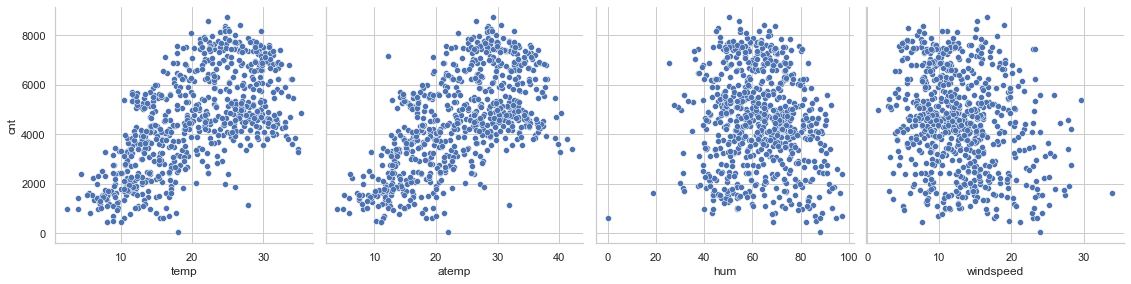

In [64]:
sns.pairplot(bike, x_vars=["temp", "atemp", "hum" ,"windspeed"], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

#### Temperature and feel temperature has the highest correlation as depicted in this figure (Correlation coefficient +0.63)

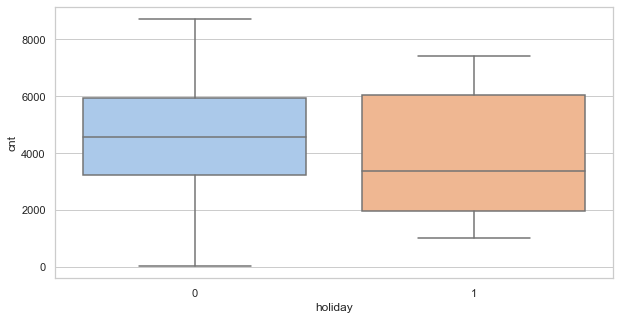

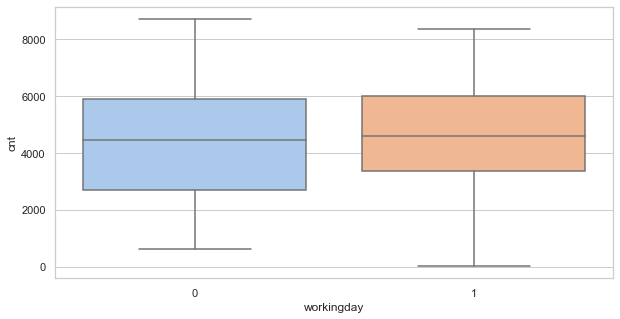

In [19]:
bivariate_numeric(bike, col ='cnt', groupby = "holiday")
bivariate_numeric(bike, col ='cnt', groupby = "workingday")

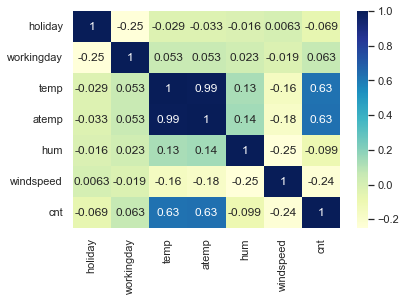

In [66]:
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### temp and atemp has 0.99 correlation. It seems we will have to drop one of them in future during model selection.

## Data Preparation

In [67]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    object  
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(1), float64(4), int64(3), object(4)
memory usage: 64.0+ KB


In [68]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Dummy Variables from categorical variables

In [23]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'var_1'
var_1 = pd.get_dummies(bike['season'], drop_first = True)

In [24]:
# Add the results to the original housing dataframe

bike = pd.concat([bike, var_1], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,2018,jan,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,2018,jan,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,2018,jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,2018,jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,2018,jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [25]:
# now, we can drop the 'season' variable
bike.drop(['season'], axis = 1, inplace = True)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,2018,jan,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2018,jan,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,2018,jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,2018,jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,2018,jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [69]:
### Let's repeat the same procedure with other categorical variables

varlist= ['yr','mnth','weekday','weathersit']

for column in bike[varlist]:
    var_1 = pd.get_dummies(bike[column], drop_first = True)
    bike = pd.concat([bike, var_1], axis = 1)
    bike.drop([column], axis = 1, inplace = True)

bike.head()

,season,holiday,workingday,temp,atemp,hum,windspeed,cnt,2019,feb,...,nov,dec,1,2,3,4,5,6,Cloudy,LightRainOrSnow
0,spring,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,spring,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,spring,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   holiday          730 non-null    int64  
 1   workingday       730 non-null    int64  
 2   temp             730 non-null    float64
 3   atemp            730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    uint8  
 8   summer           730 non-null    uint8  
 9   winter           730 non-null    uint8  
 10  2019             730 non-null    uint8  
 11  feb              730 non-null    uint8  
 12  mar              730 non-null    uint8  
 13  apr              730 non-null    uint8  
 14  may              730 non-null    uint8  
 15  jun              730 non-null    uint8  
 16  jul              730 non-null    uint8  
 17  aug             

## Splitting the Data into Training and Testing Sets


In [28]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

#### We will use min max scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,nov,dec,1,2,3,4,5,6,Cloudy,LightRainOrSnow
653,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,...,0,0,0,0,0,0,0,1,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,...,0,1,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,0,0,0,1,1,0


### Dividing into X and Y sets for the model building

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model

using `statsmodels`

There are different approaches to find an optimum linear regression model. We will initially take all the variables to build the model and then gradually adjust the model based on vif and p-value.

In [31]:
#Build a linear model with all variables

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.72
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.36e-180
Time:                        20:37:23   Log-Likelihood:                -4098.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8377.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1994.0749    374.830     

### Checking VIF

If the VIF is found to be high, we need to drop the variable

In [32]:
# all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,inf
25,5,inf
24,4,inf
23,3,inf
22,2,inf
21,1,inf
1,workingday,inf
2,temp,446.48
3,atemp,383.99
4,hum,32.80


### Dropping the variable and updating the model

#### We can drop the factor 'holiday' based on p-value and VIF and make a new model


In [33]:
X = X_train.drop('holiday', 1,)

# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.42e-181
Time:                        20:37:23   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1970.7272    370.221     

In [34]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,446.48
2,atemp,383.99
3,hum,32.80
0,workingday,31.36
7,winter,10.36
22,3,9.43
6,summer,8.94
15,aug,8.56
21,2,7.96
23,4,7.75


#### We can drop the factor 'atemp' based on p-value and VIF and make a new model

In [35]:
X = X.drop('atemp', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.74e-182
Time:                        20:37:24   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1970.4072    369.887     

In [36]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,46.36
2,hum,32.75
0,workingday,31.22
6,winter,10.34
21,3,9.39
5,summer,8.91
14,aug,8.45
20,2,7.93
22,4,7.73
13,jul,7.57


#### We still have very high VIF values for temperature, humidity, working day. But they have significant p-values in model summary. Besides, those may be important features to take business decisions. So we can go ahead with this model

### Residual Analysis of the train data

In [70]:
y_train_bike = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

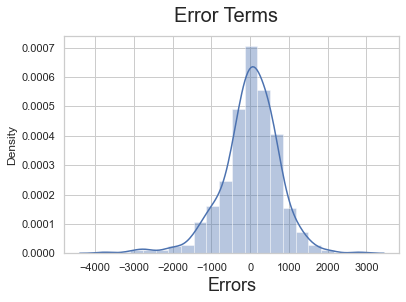

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Goldfeld Quandt Test - to check for heteroscedasticity 
#### Null Hypothesis: Error terms are homoscedastic
#### Alternative Hypothesis: Error terms are heteroscedastic.

In [72]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
result = sms.het_goldfeldquandt((y_train - y_train_bike), X_train)
lzip(name, result)

[('F statistic', 1.0294533476815821), ('p-value', 0.41354688653606664)]

####  Non-significant p-value rejects the possibility of heteroscedasticiity. Now we will try to see it graphically

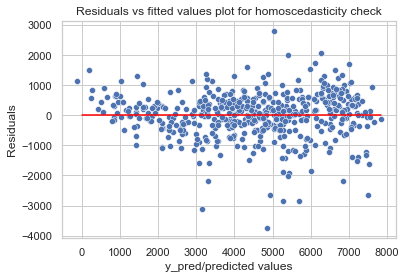

In [73]:
p = sns.scatterplot(y_train_bike,(y_train - y_train_bike))
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,max(y_train_bike)],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [75]:
# Checking accuracy in teain data

from sklearn.metrics import r2_score
r2_score(y_train, y_train_bike)



0.8533032523096307

### Making Predictions Using the Final Model

#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

In [76]:
## Scaling of test set

num_vars = ['temp','atemp','hum','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [77]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,nov,dec,1,2,3,4,5,6,Cloudy,LightRainOrSnow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
## divide test set predictor variable and target variable

y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [80]:
# Creating X_test_m3 dataframe by dropping variables from X_test_m3

X_test_m3 = X_test_m3.drop(["holiday", "atemp"], axis = 1)

In [81]:
# Making predictions using the third model

y_pred_m3 = lr_3.predict(X_test_m3)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

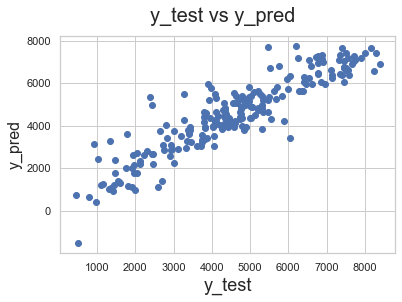

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m3)

0.8275257527788901

### The model showed good prediction power in train (0.85) and test data (0.827). So the model can be considered as good fit

Based on the coefficient values, the most important predictors are - 
•	Temperature, 
•	Weather – Light Rain or Snow
•	Year - 2019
